In [12]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np

# 0) read a market basket database from the csv file provided and generate a dataframe basket of boolean values with one row per transaction and one column per distinct item of the database; the dataframe values must be True if a distinct item is contained in the transaction 
- the file contains one transaction per line, the first 
element is the number of items in the transaction, 
followed by the items of the transaction, and then a 
variable number of empty fields 
- the field names in the first row of the csv file are not 
relevant

### Metodo lento (non provarlo nemmeno)

In [3]:
# # Read the all file in a list of lines
# lines = open('./mba.csv', 'r').readlines()

# # I extract the labels -> not relevant
# # columns = lines[0].strip().split(sep=',')

# # Extract all values
# total_items = []
# for line in lines[1:] :
#     for item in line.strip().split(sep=','):
#         if item != '' and item.isdigit()==False : total_items.append(item)

# # Mantain only the unique values
# unique_items = list(set(total_items))

# import pandas as pd
# # Build the dataframe
# basket = pd.DataFrame(columns=unique_items)
# i=0
# for line in lines[1:] :
#     for item in line.strip().split(sep=','):
#         if item != '' and item.isdigit()==False :
#             basket.loc[i, item] = True 
#         else :
#             basket.loc[i, item] = False 
#         i += 1


### Metodo veloce

In [4]:
# Open the file
file = open('./mba.csv', 'r')

# We formalize the content, putting away noisy chars
transactions = [line.strip('\n').split(',') for line in file.readlines()]

# The first row isn't important
transactions = transactions[1:]

# We use the first number to correctly prune the list
for i in range(len(transactions)) :
    end_index = int(transactions[i][0]) + 1   # The index after the last element
    transactions[i] = transactions[i][1:end_index]

# We delete the duplicates and use a boolean mapping through enconding
encoder = TransactionEncoder()
encoded_transactions = encoder.fit_transform(transactions)

# We generate the dataframe
basket = pd.DataFrame(encoded_transactions, columns=encoder.columns_)

# 1) Ignore the transactions containing a single item

In [5]:
basket

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
# find all indexes of 1-item transactions
index_drop = [i for i in range(basket.shape[0]) if basket.loc[i,:].sum() == 1]

# Drop the transactions
basket.drop(index=index_drop, inplace=True)

# 2) the column names of the output dataframe are the distinct items

In [7]:
basket.columns

Index(['Instant food products', 'UHT-milk', 'abrasive cleaner',
       'artif. sweetener', 'baby cosmetics', 'baby food', 'bags',
       'baking powder', 'bathroom cleaner', 'beef',
       ...
       'turkey', 'vinegar', 'waffles', 'whipped/sour cream', 'whisky',
       'white bread', 'white wine', 'whole milk', 'yogurt', 'zwieback'],
      dtype='object', length=169)

# 3) show the first five rows of the output dataframe

In [8]:
basket.head(5)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


# 4) show  the  number  of  transactions  and  of  distinct  items 

In [9]:
print(f"Number of transactions: {basket.shape[0]}")
print(f"Number of distinct items: {basket.shape[1]}")

Number of transactions: 7676
Number of distinct items: 169


# 5) find  a  value  of  min_support  such  that  the  apriori  algorithm generates  at  least  8  frequent  itemsets  with  at  least  2  items 
- output the result with the message below 
- min_support: 0.xxxx - number of itemsets with at least 2 
items: nn) 

In [10]:
# Set the limits
min_itemsets = 8
min_items_in_itemset = 2

# Algorithm
'''
    To obtain a range as requested we should use this fo cycle

            for support in np.arange(0.0001, 1, 0.0001) :
            
    but the kernel goes down so we need a smaller range in order
    to compute and answer
'''
for support in np.arange(0.001, 1, 0.001) :
    frequent_itemsets = apriori(basket, min_support=support, use_colnames=True)
    num = sum([len(itemset) >= min_items_in_itemset for itemset in frequent_itemsets.itemsets])
    if num >= min_itemsets : break

# Result
print(f"min_support: {support:.4f} - number of itemsets with at least 2 items: {num})")

min_support: 0.0010 - number of itemsets with at least 2 items: 19818)


# 6) find  the  minimum  metric  threshold  such  that  at  least  10 association rules are extracted from the frequent itemsets found 
- use "confidence" as metric and output the line below: 
- Metric:  "confidence"  -  min_metric:  0.xxxx  -  Number  of rules: n

In [14]:
# Set the limits
min_rules = 10

# Algorithm
'''
    To obtain a range as requested we should use this fo cycle

            for threshold in np.arange(0.0001, 1, 0.0001) :
            
    but the kernel goes down so we need a smaller range in order
    to compute and answer
'''
for threshold in np.arange(0.001, 1, 0.001) :
    rules = association_rules(frequent_itemsets, min_threshold=threshold, metric='confidence')
    if len(rules) >= min_rules : break

print(f"Metric: \"confidence\"  -  min_metric: {threshold:.4f}  -  Number  of rules: {len(rules)}")

Metric: "confidence"  -  min_metric: 0.0010  -  Number  of rules: 175708


# 7) print the first 10 rules found, sorted by descending confidence and support

In [22]:
sorted_rules = rules.sort_values(by=['support', 'confidence'], ascending=[False, False]).reset_index(drop=True).head(10)
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(other vegetables),(whole milk),0.239838,0.311621,0.095883,0.399783,1.282915,0.021145,1.146884,0.290103
1,(whole milk),(other vegetables),0.311621,0.239838,0.095883,0.307692,1.282915,0.021145,1.098011,0.320354
2,(rolls/buns),(whole milk),0.221470,0.311621,0.072564,0.327647,1.051429,0.003549,1.023836,0.062828
3,(whole milk),(rolls/buns),0.311621,0.221470,0.072564,0.232860,1.051429,0.003549,1.014847,0.071056
4,(yogurt),(whole milk),0.173528,0.311621,0.071782,0.413664,1.327459,0.017707,1.174035,0.298475
5,(whole milk),(yogurt),0.311621,0.173528,0.071782,0.230351,1.327459,0.017707,1.073830,0.358351
6,(root vegetables),(whole milk),0.136399,0.311621,0.062663,0.459408,1.474254,0.020158,1.273380,0.372499
7,(whole milk),(root vegetables),0.311621,0.136399,0.062663,0.201087,1.474254,0.020158,1.080970,0.467316
8,(root vegetables),(other vegetables),0.136399,0.239838,0.060709,0.445081,1.855754,0.027995,1.369861,0.533968
9,(other vegetables),(root vegetables),0.239838,0.136399,0.060709,0.253123,1.855754,0.027995,1.156283,0.606628


# 8) plot  confidence  and  support  for  all  the  sorted  rules  found

<Axes: title={'center': 'Association Rules'}>

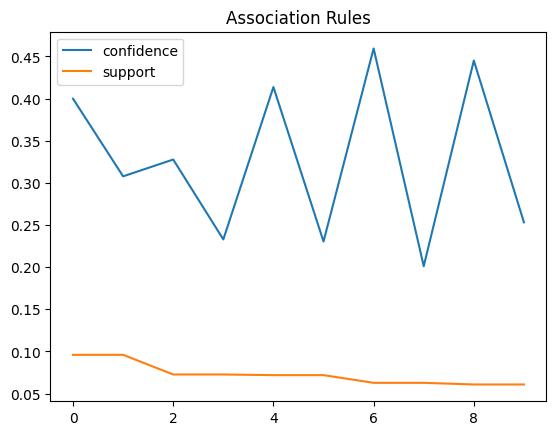

In [23]:
sorted_rules[['confidence', 'support']].plot(title='Association Rules')

# 9) scatter plot the rules by confidence and support, labelling the points  with  the  index  value  of  the  corresponding  rule  (hint https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point)

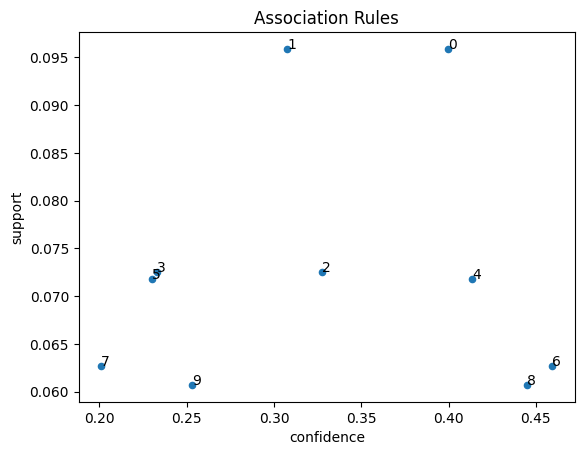

In [27]:
from matplotlib import pyplot as plt

fig = sorted_rules.plot.scatter(x = 'confidence', y = 'support', title ='Association Rules')

for i in range(len(sorted_rules)) :
    fig.annotate(text=i, xy=(sorted_rules['confidence'][i], sorted_rules['support'][i]))